In [1]:
# Checking the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.6 (main, Nov  2 2022, 18:53:38) [GCC 11.3.0]
scipy: 1.8.0
numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.5.1
sklearn: 1.1.3


In [2]:
#https://www.kaggle.com/code/sagarvarandekar/eda-fraud-detection-by-classification-algorithms
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np # linear algebra
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy 
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline
import seaborn as sns
sns.set(palette="Set2")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import GausianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler

#from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest





In [3]:
#load dataset
data = pd.read_csv("Fraud_DataSet.csv")

In [4]:
#shape
#there are over a million instances (rows) and 5 attributes (lolumns)
print(data.shape)

(1048575, 11)


In [5]:
# head
print(data.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225            

In [6]:
# descriptions
print(data.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.048575e+06  1.048575e+06   1.048575e+06    1.048575e+06   
mean   2.696617e+01  1.586670e+05   8.740095e+05    8.938089e+05   
std    1.562325e+01  2.649409e+05   2.971751e+06    3.008271e+06   
min    1.000000e+00  1.000000e-01   0.000000e+00    0.000000e+00   
25%    1.500000e+01  1.214907e+04   0.000000e+00    0.000000e+00   
50%    2.000000e+01  7.634333e+04   1.600200e+04    0.000000e+00   
75%    3.900000e+01  2.137619e+05   1.366420e+05    1.746000e+05   
max    9.500000e+01  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.048575e+06    1.048575e+06  1.048575e+06       1048575.0  
mean     9.781600e+05    1.114198e+06  1.089097e-03             0.0  
std      2.296780e+06    2.416593e+06  3.298351e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%      0.000000e+00    0.000000e+00

In [7]:
# class distribution
print(data.groupby('type').size())

type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
dtype: int64


In [8]:
#data cleaning
#viewing dataframe
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,0


In [9]:
#checking count of non fraud
data['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [10]:
#checking count of fraud
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [11]:
#Checking for Null values in dataset or missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# Missing Values Check
print('Maximum number of missing values in any column: ' + str(data.isnull().sum().max()))

Maximum number of missing values in any column: 0


In [13]:
#checking duplicates
data.duplicated().sum()

0

In [14]:
# shape of data
print(list(data.columns))
print(f'The dataset has shape {data.shape}')

['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
The dataset has shape (1048575, 11)


In [15]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


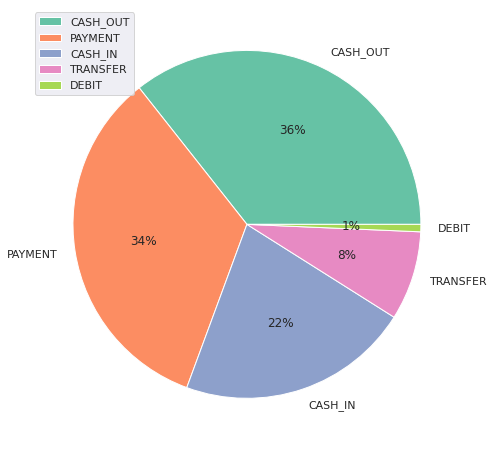

In [17]:
#visualizing the type of transaction s to see which are more like to be fraudulent
type = data['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

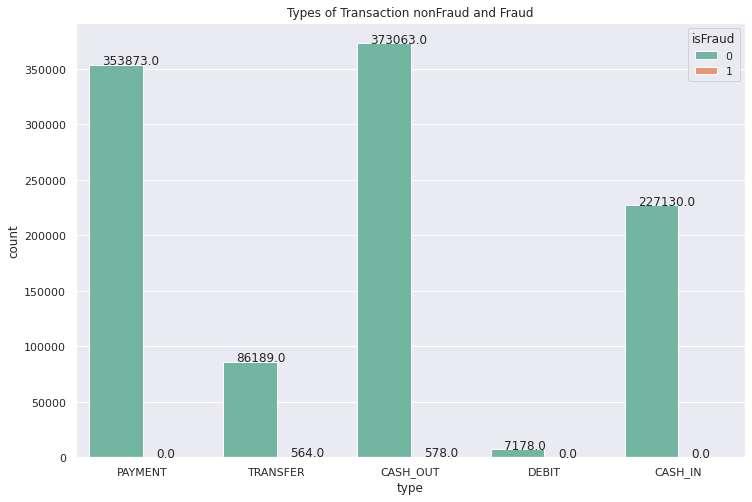

In [18]:
#Count of Fraud and Non-Fraud Transactions in each type of Transaction
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = data)
plt.title('Types of Transaction nonFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [19]:
data1=data[(data['isFraud']==1) & (data['type']=='TRANSFER')]
data1['nameDest'].value_counts()

C553264065     1
C1105243161    1
C29406343      1
C548676992     1
C506992553     1
              ..
C1466511502    1
C2145664965    1
C866867675     1
C399994587     1
C757947873     1
Name: nameDest, Length: 564, dtype: int64

In [20]:
data2=data[(data['isFraud']==1) & (data['type']=='CASH_OUT')]
data2['nameOrig'].value_counts()

C840083671     1
C32861099      1
C1032527042    1
C1336358470    1
C1563094045    1
              ..
C1257352420    1
C1657291163    1
C1455982049    1
C1845753498    1
C409531429     1
Name: nameOrig, Length: 578, dtype: int64

In [21]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [22]:
print(fraud.shape)
print(valid.shape)

(1142, 11)
(1047433, 11)


<AxesSubplot:xlabel='isFraud', ylabel='isFraud'>

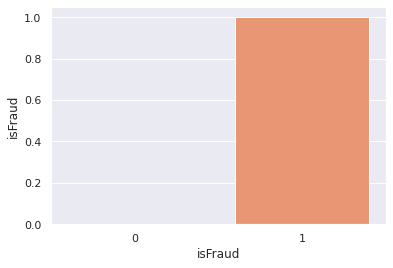

In [23]:
#checking class imbalance
import seaborn as sns

sns.barplot(x=data["isFraud"], y=data["isFraud"])

In [24]:
fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

#checking if the recipient account of a fraudulent transfer was used as a sending account for cashing out 
fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

In [25]:
# adding feature type1
data_new = data.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"Type2"] = "MM"

Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

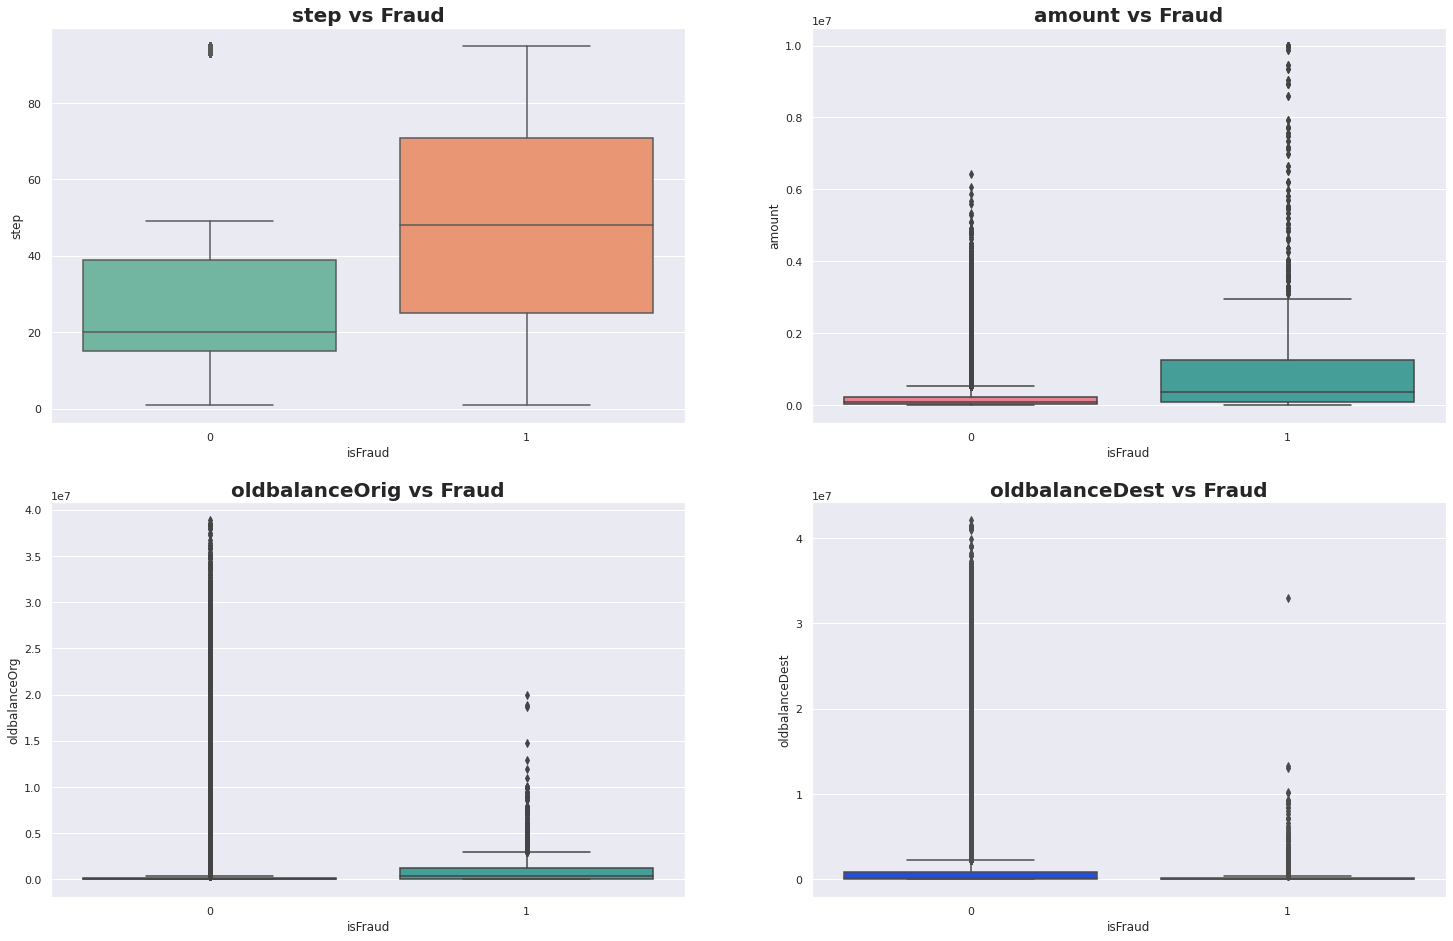

In [26]:
#Visualizing Numeric variables against Fraud using Boxplots
plt.figure(figsize=(25, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = data_new)
plt.title('step vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = data_new,palette="husl")
plt.title('amount vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data_new, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data_new,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)

In [27]:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [28]:
print("Fraud transactions by type1: \n",fraud.Type2.value_counts())
print("\n Valid transactions by type1: \n",valid.Type2.value_counts())

Fraud transactions by type1: 
 CC    1142
Name: Type2, dtype: int64

 Valid transactions by type1: 
 CC    693560
CM    353873
Name: Type2, dtype: int64


In [29]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  84.0
Percentage of observations with balance errors in the account receiving money:  100.0


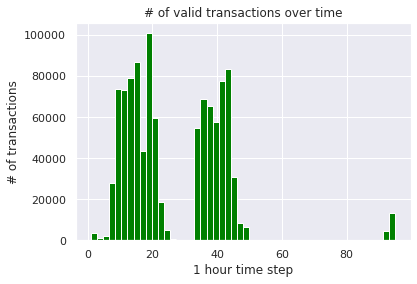

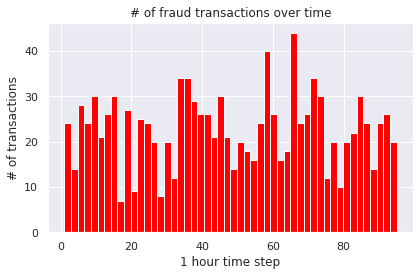

In [30]:
bins = 50

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

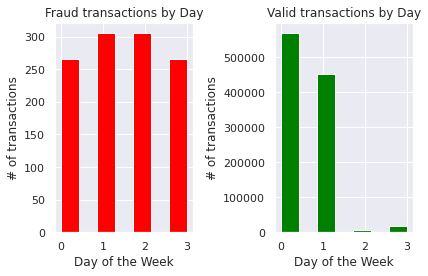

In [31]:
num_days = 7
num_hours = 24
fraud_days = (fraud.step//num_hours)% num_days
fraud_hours = fraud.step % num_hours
valid_days = (valid.step//num_hours) % num_days
valid_hours = valid.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

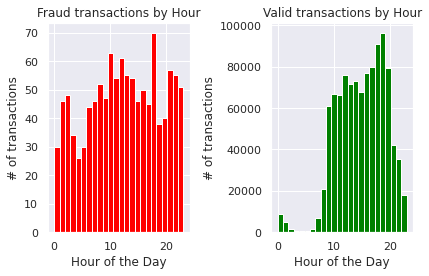

In [32]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

In [33]:
data_new["HourOfDay"] = np.nan # initializing feature column
data_new.HourOfDay = data_new.step % 24


print("Head of dataset1: \n", pd.DataFrame.head(data_new))

Head of dataset1: 
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud Type2  \
0  M1979787155             0.0             0.0        0               0    CM   
1  M2044282225             0.0             0.0        0               0    CM   
2   C553264065             0.0             0.0        1               0    CC   
3    C38997010         21182.0             0.0        1               0    CC   
4  M1230701703             0.0             0.0        0               0    CM   

   HourOfDay  
0          1  
1          1

In [34]:
#drop column  irrelavant for modelling. These are isFlaggedFraud, nameOrig, nameDest columns.
data_new = data_new.drop(['isFlaggedFraud','nameOrig','nameDest'],1)

#data.drop(['isFlaggedFraud','nameOrig','nameDest'], axis=1, inplace=True)

In [35]:
data_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'Type2', 'HourOfDay'],
      dtype='object')

In [36]:
data_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type2,HourOfDay
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,CM,1
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,CM,1
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,CC,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,CC,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,CM,1
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72,0,CC,23
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00,0,CM,23
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00,0,CM,23
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00,0,CM,23


In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_new['type'] = encoder.fit_transform(data_new['type'])
data_new['Type2'] = encoder.fit_transform(data_new['Type2'])

In [38]:
data_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type2,HourOfDay
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,1,1
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,1,1
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,23
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00,0,1,23
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00,0,1,23
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00,0,1,23


In [39]:
data_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'Type2', 'HourOfDay'],
      dtype='object')

In [54]:
# X y split
X = data_new.drop("isFraud",1)
y = data_new.isFraud

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [55]:
# X.head()

In [70]:
train_test_split?

In [73]:
#train-test split
seed = 35
np.random.seed(35)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
# X_train=scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [74]:
print(f'X train : {X_train.shape}\n X test, {X_test.shape}\n y train {y_train.shape}\n y test {y_test.shape}')

X train : (1466406, 9)
 X test, (628460, 9)
 y train (1466406,)
 y test (628460,)


In [75]:
print(f' 1 : {sum(y_train==1)}')
print(f' 0 : {sum(y_train==0)}')

 1 : 733620
 0 : 732786


In [76]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

conf_matr_log = confusion_matrix(y_test, y_pred, normalize='true')

print(classification_report(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94    314647
           1       0.92      0.96      0.94    313813

    accuracy                           0.94    628460
   macro avg       0.94      0.94      0.94    628460
weighted avg       0.94      0.94      0.94    628460

Area under precision (AUC) Recall: 0.9024005195932275


<AxesSubplot:>

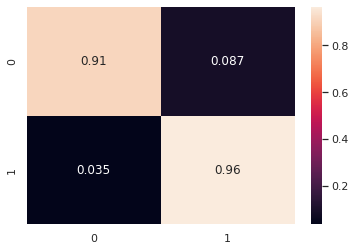

In [77]:
sns.heatmap(conf_matr_log, annot=True)

In [90]:
rf_model = RandomForestClassifier(n_jobs=-1, max_depth=7, n_estimators=20)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

conf_matr_rf = confusion_matrix(y_test, y_pred, normalize='true')

print(classification_report(y_test, y_pred))

print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97    314647
           1       0.98      0.95      0.97    313813

    accuracy                           0.97    628460
   macro avg       0.97      0.97      0.97    628460
weighted avg       0.97      0.97      0.97    628460

Area under precision (AUC) Recall: 0.9601529545363477


<AxesSubplot:>

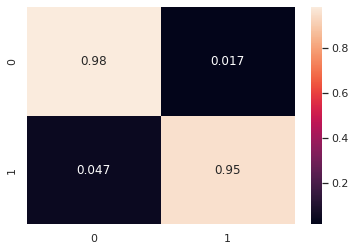

In [91]:
sns.heatmap(conf_matr_rf, annot=True)

In [81]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred= nb_model.predict(X_test)

conf_matr_nb = confusion_matrix(y_test, y_pred, normalize='true')

print(classification_report(y_test, y_pred))

print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.30      0.44    314647
           1       0.58      0.96      0.72    313813

    accuracy                           0.63    628460
   macro avg       0.72      0.63      0.58    628460
weighted avg       0.72      0.63      0.58    628460

Area under precision (AUC) Recall: 0.5717655345139877


<AxesSubplot:>

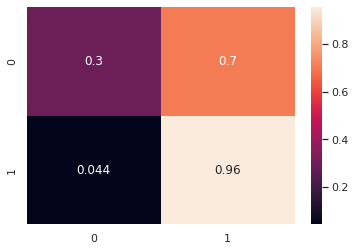

In [82]:
sns.heatmap(conf_matr_nb, annot=True)

In [92]:
log_score = log_reg.score(X_train, y_train)
rf_score = rf_model.score(X_train, y_train)
nb_score = nb_model.score(X_train, y_train)

## Plotting the score of all 3 models

<BarContainer object of 3 artists>

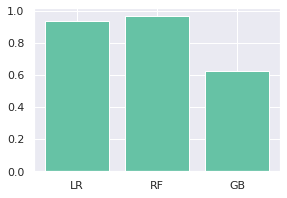

In [93]:
names = ['LR', 'RF', 'GB']
values = [log_score, rf_score, nb_score]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
